# Fitting is an Art!

Python macro for testing which fitting procedure is likely to give the "best" results.

In this case, we consider **a function with x-values far from zero** leading to extremely high correlations.
Mixed with bad starting parameters, the fit fails.

### Authors:
- Troels Petersen ([email](mailto:petersen@nbi.dk))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit, cost
from scipy import stats

In [2]:
r = np.random
r.seed(40)
SavePlots = False

# CASE: Fit with x-values in a small range far from zero:

The initial fitting function is the following:

* $f(x) = ax + b$

If the x-values are far from zero (e.g. the year we are in), then any change in $a$ gives a major change in $b$, and the two gets very correlated. However, if the mean $x$-value (or some value close to it) is subtracted from $a$ in the function, then this is avoided, as $b$ is now the $y$ value at the middle of this point, which is not subject to much change.

* $f(x) = a(x - \bar{x}) + b$

The linear function is a particularly simple example, which can be solved numerically. In the below example, we consider the **exponential function**.

In [3]:
# Relevant range:
xmin = 2020
xmax = 2021
Npoints = 13

# Function parameters:
a = 110.0
b = 0.005
c = -100.0
sigmay = 0.5

# Generating (thus known) data:
x = np.linspace(xmin, xmax, Npoints)
y = a*np.exp(b*(x-2020)) + c + r.normal(0.0, sigmay, len(x))
sy = sigmay * np.ones(Npoints)

In [ ]:
def func_bad(x, a, b, c) :
    # return a*x + b
    return a*np.exp(b*x) + c

def func_good(x, a, b,c) :
    # return a*(x-2015) + b
    return a*np.exp(b*(x-2020)) + c




cfit = cost.LeastSquares(x, y, sy, func_good)
mfit = Minuit(cfit, a=110, b=0.005,c =-100)
mfit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 10.45 (χ²/ndof = 1.0)      │              Nfcn = 45               │
│ EDM = 5.02e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   109.9   │    1.8    │            │            │         │         │       │
│ 1 │ b    │   0.011   │   0.004   │            │            │         │         │       │
│ 2 │ c    │  -100.1   │    1.8    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │         a         b         c │
├───┼───────────────────────────────┤
│ a │      3.43 -0.760e-3      -3.4 │
│ b │ -0.760e-3  1.59e-05 -0.117e-3 │
│ c │      -3.4 -0.117e-3      3.43 │
└───┴───────────────────────────────┘

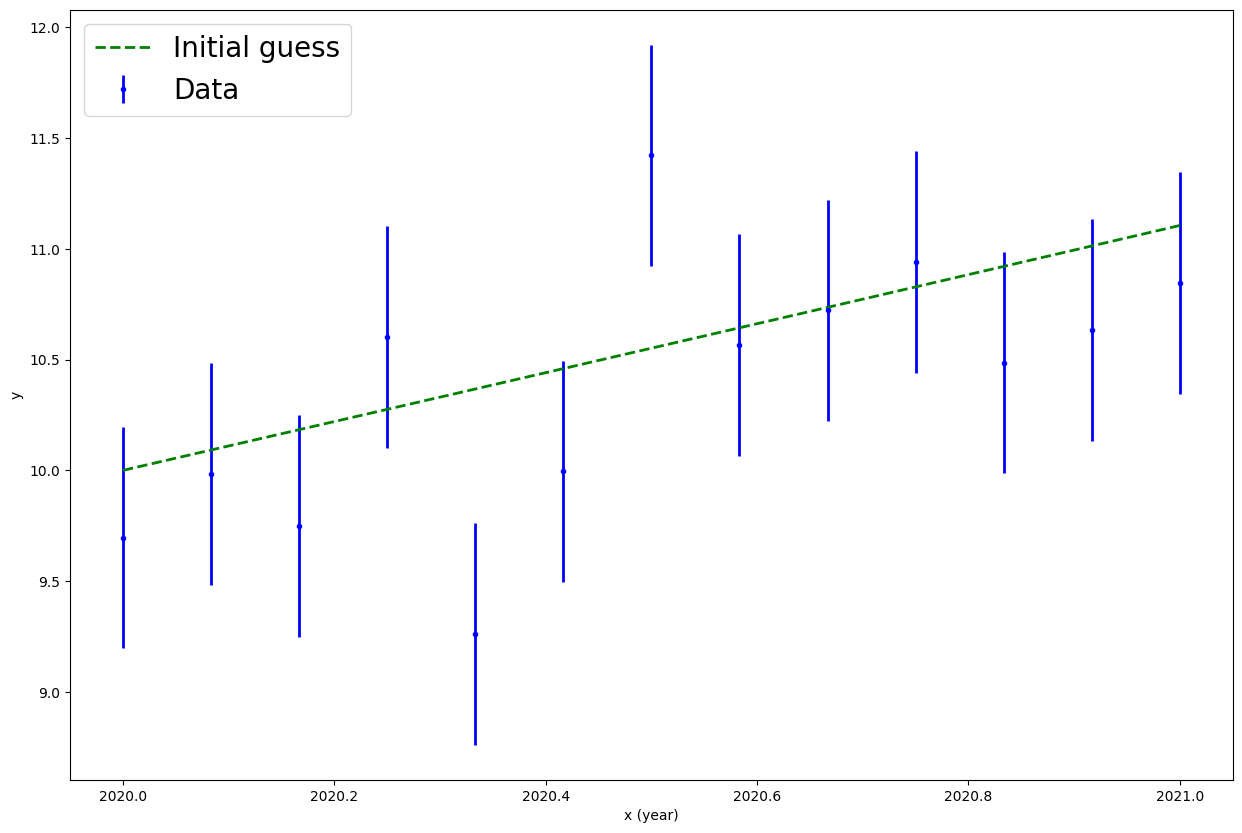

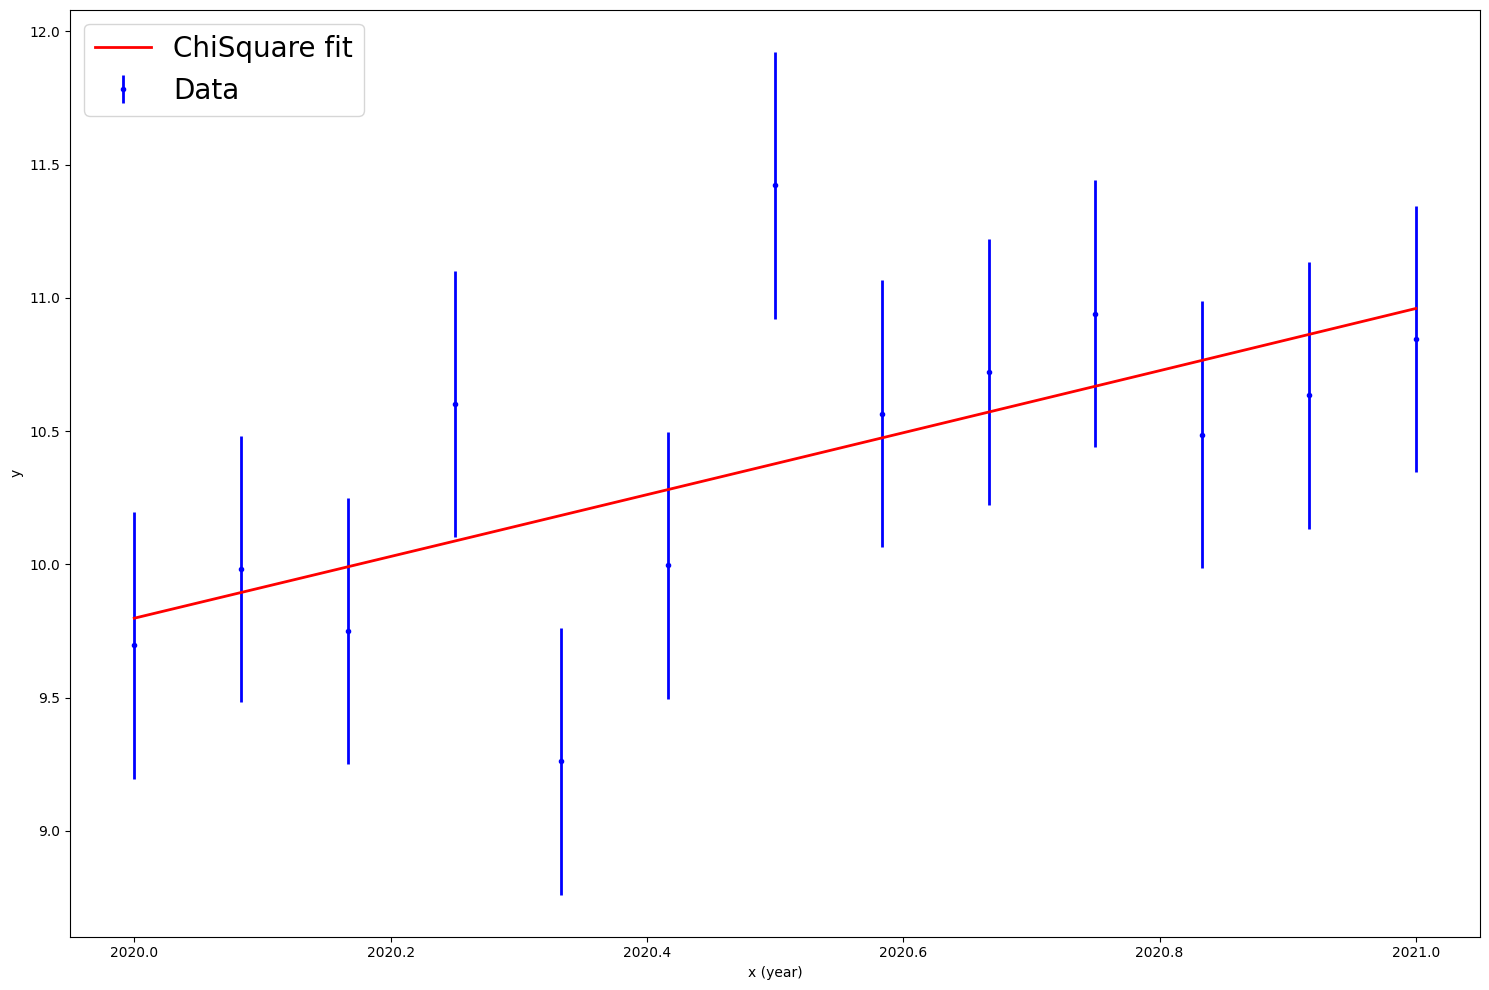

In [24]:
x_fit = np.linspace(xmin, xmax, 1000)
y_fit = func_good(x_fit, *mfit.values[:])

initial_guess = func_good(x_fit, 110, 0.01, -100)
fig_check, ax_check = plt.subplots(figsize=(15, 10))
ax_check.errorbar(x, y, sy, fmt='.', linewidth=2, color='blue', label="Data")
ax_check.plot(x_fit, initial_guess, '--', color='green', linewidth=2, label='Initial guess')
ax_check.set(xlabel='x (year)', ylabel='y')
ax_check.legend(loc='upper left', fontsize=20)
plt.show()

fig, ax = plt.subplots(figsize=(15, 10))
plot_data = ax.errorbar(x, y, sy, fmt='.', linewidth=2, color='blue', label="Data")
ax.plot(x_fit, y_fit, '-', color='red', linewidth=2, label='ChiSquare fit')
ax.set(xlabel='x (year)', ylabel='y')
ax.legend(loc='upper left', fontsize=20)
fig.tight_layout()

# Questions:

Consider the case and argue/discuss which fitting procedure should be used.

# Learning points:

This exercise in "fitting tricks" should teach you that:
1. __Good starting values is paramount!__ (Almost all fits fail with poor starting values).
2. The form of the fitting function is also important.<br>
   a. Ensure that the x-values do not represent some small range far from 0.<br>
   b. Ensure that you give the fitting function enough freedom to fit the data.<br>
   c. Conversely, try to curb the number of parameters, if there are arguments for doing so (calibration peaks).<br>
   d. Make sure that you've normalised your fitting PDFs, to avoid correlations between normalisation and parameters.
3. If a fit continues to fail, try simply to draw the function and starting values on top of the data. Often, they don't match well (general advice, not just in this exercise).